EE 502 P: Analytical Methods for Electrical Engineering
    
# Homework 1: Python
## Due 2 October, 2019 at 6:00 PM
### **<span style="color: green">Peter McEldowney</span>**

Copyright &copy; 2019, University of Washington

<hr>

**Instructions**: Use this notebook as a template. Answer all questions using well formatted Markdown with embedded LaTeX equations, executable Jupyter cells, or both. Submit your homework solutions as an `.ipynb` file via Canvas.

<span style="background: yellow; padding: 6px; border: 1pt solid black">
Although you may discuss the homework with others, you must turn in your own, original work.
</span>

**Things to remember:**
- Use complete sentences. Equations should appear in text as grammatical elements.
- Comment your code.
- Label your axes. Title your plots. Use legends where appropriate. 
- Before submitting a notebook, choose Kernel -> Restart and Run All to make sure your notebook runs when the cells are evaluated in order. 

Note : Late homework will be accepted up to one week after the due date and will be worth 50% of its full credit score. 

### 0. Warmup (Do not turn in)

- Get Jupyter running on your computer, or learn to use Google Colab's Jupyter environment.
- Make sure you can click through the Lecture 1 notes on Python. Try change some of the cells to see the effects. 
- If you haven't done any Python, follow one of the links in Lecture 1 to a tutorial and work through it.
- If you haven't done any Numpy or Sympy, read through the linked documentation and tutorials for those too.

- - -
- - -

### **1.** Whitespace
Write two short Python fragments that are syntactically correct, have exactly the same non-whitespace characters **in the same order**, do not use random number generators, but produce (e.g. print) different results.

- - -
#### **Answer**

In [1]:
print(5/2)
print(5//2)

2.5
2


- - -
- - -

### **2.** Complex Numbers
Write a function `rand_complex(n)` that returns a list of `n` random complex numbers uniformly distributed in the unit circle (i.e. the magnitudes of the numbers are all between 0 and 1). Give the function a docstring. Demonstrate the function by making a list of 25 complex numbers. 

- - -
#### **Answer**

[(0.5187107342608361-0.22737459105388202j),
 (-0.588398058130239-0.044545551229288716j),
 (-0.6654591878503904-0.4055012251678094j),
 (0.48468979419368563-0.3473776634584591j),
 (-0.39588367842887573+0.17512450935080093j),
 (0.7995118871450488+0.361419362522307j),
 (0.41385868252722813-0.5655110070356459j),
 (0.7106401041430439-0.5241233832642194j),
 (-0.817882685456836+0.4035456356982632j),
 (0.1702899476278461-0.12968038894079092j),
 (0.7336192949989324+0.4159100216506897j),
 (0.07237805418462262+0.3089751509108345j),
 (0.38396838859801585+0.5650545825836943j),
 (0.09268637736165974+0.9855748954327193j),
 (0.4454700813387238-0.6085417111914977j),
 (-0.0015922479381789145-0.06366776560174636j),
 (0.5552296552599192-0.33527963027388163j),
 (-0.754195075910824+0.24760072100996644j),
 (0.21526176619048165+0.47133464664105085j),
 (-0.50004880465391-0.13614749338234922j),
 (0.3963068352719574-0.6122313290366181j),
 (-0.9255947055775895-0.1540201990438641j),
 (-0.0660982008787252-0.95922824

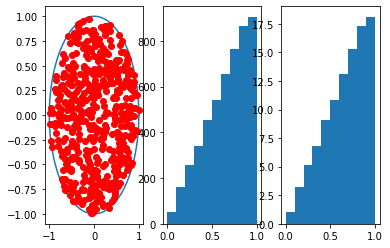

In [12]:
import matplotlib.pyplot as plt
import numpy
from numpy import array, abs
import math


def rand_complex(n: int, epsilon: float = 1e-9) -> list:
    """
    Returns a list of n random complex numbers that are uniformly distributed
        across the unit circle (ie. all their magnitudes are <= 1.0 + epsilon)

    :float epsilon: the acceptable amount of error
    :return list: of uniformly distributed numbers
    """
    # get lists of n random numbers with a uniform distribution 
    #  for real and complex parts of the number
    numbers = []
    while len(numbers) < n:
        real_parts = numpy.random.uniform(-1.0, 1.0, size=n - len(numbers))
        complex_parts = numpy.random.uniform(-1.0, 1.0, size=n - len(numbers))
        nums = array(real_parts) + 1j*array(complex_parts)
        # since the real and complex parts generated above are in the unit square
        #  but we only elements in the unit circle, we filter anything
        #  with a magnitude > 1.0 + epsilon out of our list and iterate
        numbers += [x for x in nums if abs(x) <= 1.0 + epsilon]

    return numbers


def test_it(runs=1000, elements_per_run=1000, epsilon=1e-7):
    """ This function calls rand_complex runs times. It verifies that each
    element returned by rand_complex is within epsilon of a magnitude of 1.0.
    Each time rand_complex is called, a histogram is used to check how many
    elements fall into each cross section of the circle. See the comment below
    the plt.bar line for a complete explanation of why these results make sense.
    """
    
    # these variables are for a histogram of all runs
    bin_edges, y_hist = None, None

    # iterate while validating each run
    for trial in range(runs):
        nums = rand_complex(elements_per_run)
        #print('run_%03d: min(%s), max(%s)' % (trial, min(nums), max(nums)))
        
        # check the magnitude
        magnitudes = [abs(x) for x in nums]
        assert all(m >= 0.0 and m <= 1.0 + epsilon for m in magnitudes), \
            'not properly normalized, found %d elements with a magnitude > 1.0' \
            % (len([x for x in magnitudes if x > 1.0+epsilon]))
        #print('%d\n=========\n%s' % (trial, '\n'.join(['|x_%d| = %.02f, x_%d = %s' % (i, abs(nums[i]), i, str(nums[i])) for i in range(len(nums))])))
        
        # aggregate histogram results from all runs
        values, edges = numpy.histogram(magnitudes, bins=10, range=(0,1.0))
        if bin_edges is None:
            bin_edges = edges
            y_hist = values
        else:
            #assert all(edges[i] == bin_edges[i] for i in range(len(bin_edges)))  # sanity check
            y_hist += values
            
    # plot the last result on the unit circle (sanity check)
    plt.subplots(1,3)
    t = numpy.linspace(0,2*math.pi,101)
    plt.subplot(1,3,1)
    plt.plot(numpy.cos(t),numpy.sin(t))
    plt.plot([x.real for x in nums], [x.imag for x in nums], 'ro')

    # plot the aggregate histogram from all runs
    plt.subplot(1,3,2)
    # the [:-1] for x_hist is because numpy.histogram inclusively returns the edges of
    #  each bin. Since we know that the magnitude of each complex number is <= 1.0,
    #  we do not want to graphically display any elements in the last bin.
    plt.bar(bin_edges[:-1], height=y_hist, width=0.1, align='edge')
    
    # Explanaton of expected bar graph results:
    #
    # the expectation with this bar graph is that as the number of runs (or number
    #  of random elements increases), it will become more linear. This is because
    #  we are looking at the probability that you are within 2 circles of radius
    #  r_i and r_i+1 from the center where the distance between r_i and r_i+1 is
    #  determined by the number of bins in the histogram. 
    #
    # For example, with 10 bins, r_i and r_i+1 are 0.1 apart from each other. This 
    #  means that each bin is actually representing the area of a cross section
    #  of the circle. Below shows those areas and the percentage of total area
    #  that represents..
    #  inner_r - outer_r: area: % of total area
    #  0.0 - 0.1: 0.0314: 1%
    #  0.1 - 0.2: 0.0942: 3%
    #  0.2 - 0.3: 0.1571: 5%
    #  0.3 - 0.4: 0.2199: 7%
    #  0.4 - 0.5: 0.2827: 9%
    #  0.5 - 0.6: 0.3456: 11%
    #  0.6 - 0.7: 0.4084: 13%
    #  0.7 - 0.8: 0.4712: 15%
    #  0.8 - 0.9: 0.5341: 17%
    #  0.9 - 1.0: 0.5969: 19%
    #
    # The % of total area of the circle is the probability that a point will
    #  land in that region. Since that increases linearly, I expect the histogram
    #  exhibit the behavior described above.
    
    # plot histogram values as percentage of total elements instead of number of elements
    plt.subplot(1,3,3)
    num_elem = runs*elements_per_run
    plt.bar(bin_edges[:-1], height=[(y/num_elem)*100 for y in y_hist], width=0.1, align='edge')
    

def get_section_area(r_0, r_1):
   a_1 = math.pi*r_1**2
   a_0 = math.pi*r_0**2
   return a_1 - a_0

def print_section_sizes(num_sections=10):
    sections = [x/num_sections for x in range(num_sections+1)]
    # total_area should be approximately math.pi since it's the unit circle
    total_area = 0
    epsilon = 1e-6
    for i in range(len(sections)-1):
        r_0 = sections[i]
        r_1 = sections[i+1]
        area = get_section_area(r_0, r_1)
        print('    #  %.1f - %.1f: %.4f: %.0f%%' % (r_0, r_1, area, 100*(area/math.pi)))
        total_area += area
    assert total_area < math.pi + epsilon and total_area > math.pi - epsilon, \
        "total area calculation wrong for cross sections...? or too tight of epsilon.."

#?numpy.histogram
#print_section_sizes()
kwargs = {
    'runs': 10,
    'elements_per_run': 500,
}
test_it(**kwargs)
rand_complex(25)


- - -
- - -

### **3.** Hashes
Write a function `to_hash(L) `that takes a list of complex numbers `L` and returns an array of hashes of equal length, where each hash is of the form `{ "re": a, "im": b }`. Give the function a docstring and test it by converting a list of 25 numbers generated by your `rand_complex` function. 

- - -
#### **Answer**

In [3]:
def to_hash(L: list) -> list:
    """ Takes the input list of complex numbers and computes a hash of the
    real and complex components. It then returns a list of dictionaries for
    each element in the original list with those hashes.
    
    :list L: a list of complex numbers
    :return list: this list is a list of dictionary where the index of
        the output list represents the element at the index of L. Each
        output list dictionary has 2 keys, 're' and 'im' for the hash 
        of the real and imaginary components of each number.
    """
    output = []
    for item in L:
        output.append({'re': hash(item.real), 'im': hash(item.imag)})
    return output

nums = rand_complex(25)
from pprint import pprint
pprint(to_hash(nums))

# to see that they are the same size, run this function
def pprint_as_hex(nums):
    hashed_nums = to_hash(nums)
    for i in range(len(nums)):
        print('%s re: 0x%x, im: 0x%x' % (str(nums[i]), hashed_nums[i]['re'], hashed_nums[i]['im']))
        
#pprint_as_hex(nums)

[{'im': -195404444569433088, 're': -2101381702911643648},
 {'im': 72981379985309184, 're': -2107651705587951616},
 {'im': 1935470123768865792, 're': 966216736035992064},
 {'im': 1646343283537340928, 're': 763523984653144064},
 {'im': 53899871355369984, 're': 918325061152857600},
 {'im': -55789103080030720, 're': 1717396175583523328},
 {'im': -1647330739603942400, 're': 1579938156105966592},
 {'im': 1625667413869455872, 're': 686069731283109888},
 {'im': -799052198893224960, 're': 397862361701587968},
 {'im': -862384370177605632, 're': -714481296365131776},
 {'im': -1943441656781063168, 're': -1049072819659836928},
 {'im': -91046799114044928, 're': -1137946394713880064},
 {'im': -451268157940295680, 're': -1689424427002356736},
 {'im': 1527421470486125568, 're': 979168647781394944},
 {'im': 1370769338345215488, 're': -1595144882768713216},
 {'im': 2088687474641947648, 're': 950262612472001536},
 {'im': 621578539555776000, 're': 1375924743450780160},
 {'im': 1202858348834309120, 're': 14

- - -
- - -

### **4.** Matrices

Write a function `upper_traingular(n)` that returns an $n \times n$ numpy matrix with zeros on the lower diagonal, and ones on the diagonal and upper diagonal. For example, `upper_triangular(3)` would return

```python
array([[1, 1, 1],
       [0, 1, 1],
       [0, 0, 1]])
```

- - -
#### **Answer**

In [4]:
import numpy
from numpy import array

def upper_triangular(n: int) -> array:
    ret = numpy.zeros((n, n))
    for i in range(n):
        ret[i, i:n] = 1

    return ret


#upper_triangular(2)
upper_triangular(3)
#upper_triangular(4)
#upper_triangular(5)
#upper_triangular(6)

array([[1., 1., 1.],
       [0., 1., 1.],
       [0., 0., 1.]])

- - -
- - -

### **5.** Numpy

Write a function `convolve(M,K)` that takes an $n \times m$ matrix $M$ and a $3 \times 3$ matrix $K$ (called the kernel) and returns their convolution as in the following diagram:

<img src="http://machinelearninguru.com/_images/topics/computer_vision/basics/convolution/5.JPG" width=500>

Do not use any predefined convolution functions from numpy or scipy. Write your own. If the matrix $M$ is too small, your function should return a exception.

The matrix returned will have two fewer rows and two fewer columns than $M$. Test your function by making a $100 \times 100$ matrix of zeros and ones that as an image look like the letter X and convolve it with the kernel

$$
K = \frac{1}{16} \begin{pmatrix}
1 & 2 & 1 \\
2 & 4 & 2 \\
1 & 2 & 1
\end{pmatrix}
$$

Use `imshow` to display both images using subplots. 

- - -
#### **Answer**

my convolve() took 0:00:00.052888


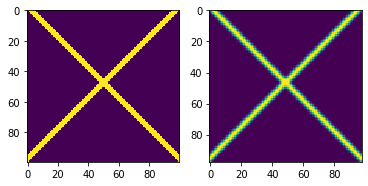

In [5]:
import datetime  # for curiosity (mainly because I implemented it in parallel first but removed that for readability)
import matplotlib.pyplot as plt
import numpy

class InvalidKernelSize(Exception):
    pass

class InvalidOperation(Exception):
    pass

def convolve(M, K):
    """
    This function convolves a MxN matrix with a 3x3 kernel K
        The resulting matrix is (M-2)x(N-2)
    """
    # input validation
    K = numpy.array(K)
    if K.shape != (3,3):
        raise InvalidKernelSize("matrix is not 3x3: size=%d, shape=%s" % (K.size, str(K.shape)))

    M = numpy.array(M)
    if M is None or len(M.shape) != 2 or \
        M.shape[0] < K.shape[0] or M.shape[1] < K.shape[1]:
            print('M.shape = %s -- K.shape = %s' % (M.shape, K.shape))
            raise InvalidOperation('matrix is too small for operation you goofball')

    # f: R^(3x3) -> R
    def calculate_element(m, K):
        """ This function performs the product of each individual elements
        of the array and returns the sum of them.
        """
        assert m.shape == K.shape, 'invalid size, cannot calculate element: m.shape=%s, K.shape=%s' % (str(m.shape), str(K.shape))
        final = 0
        for i in range(len(m)):
            for j in range(len(m[i])):
                final += m[j,i]*K[i,j]
        return final

    # iterate through and calculate each new element
    resulting_array = numpy.zeros((M.shape[0]-2, M.shape[1]-2))
    for i in range(len(M)-2):
        for j in range(len(M[i])-2):
            resulting_array[i,j] = calculate_element(m=M[i:i+3,j:j+3], K=K)

    return resulting_array


def get_x(n, w=1):
    """
    Gets an NxN array of mostly 0s with 1s in the shape of an X
        across the diagonals (width of w). 
        
    This X is not completely centered.
        The orientation is such that in the first row, we start drawing the X 
        from the edges. This leads to the center being shifted up by w/2 
        (ie. if you inscribe a square in the center of the x (that touches all
        4 edges of the center), the bottom of that square would be at the 
        center of the image)
    """
    ret = numpy.zeros((n,n))
    for i in range(n):
        ret[i, i:i+w] = 1

        # handle edge case in upper right corner
        if i == 0:
            ret[i,-1] = 1
            offset = 1
        else:
            offset = 0

        start = -(i+w)
        stop = -(i+offset)
        ret[i, start:stop] = 1

    return ret

# The following code does the requested subplots.
#  It also has the ability to compare my results to the
#  scipy convolution f(x) as a sanity check.
compare_to_scipy = False
if compare_to_scipy:
    subplot_dims = (2,2)
else:
    subplot_dims = (1,2)

# generate teh X
x = get_x(100, w=5)
K = (1/16)*numpy.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1],
])

# plot the x
plt.subplots(*subplot_dims)
plt.subplot(*subplot_dims,1)
plt.imshow(x)

# plot the results of my convolution f(x) (times it too)
plt.subplot(*subplot_dims,2)
start = datetime.datetime.now()
conv_x = convolve(x, K=K)
print('my convolve() took %s' % (datetime.datetime.now() - start))
plt.imshow(conv_x)

if compare_to_scipy:
    # uncomment for sanity check
    plt.subplot(*subplot_dims,3)
    plt.imshow(x)

    import scipy, scipy.ndimage
    plt.subplot(*subplot_dims,4)
    start = datetime.datetime.now()
    c = scipy.ndimage.filters.convolve(x, K)
    print('scipy.ndimage.filters.convolve took %s' % (datetime.datetime.now() - start))
    plt.imshow(c)

    if c.shape != conv_x.shape:
        print('shape is different: s(%s) mine(%s)' % (c.shape, conv_x.shape))

    # quick count of number of different points in my convolution vs. scipy
    fails = []
    for i in range(1, len(c)-1):
        for j in range(1, len(c[i])-1):
            #print('i=%d j=%d' % (i,j))
            if c[i,j] != conv_x[i-1,j-1]:
                fails.append((i,j))
    print('%d failed points out of %d' % (len(fails), (len(c)-2)*(len(c[0])-2)))

# # sample from prompt
# test_vector = array([
#     [0, 0, 0, 0, 0, 0],
#     [0, 105, 102, 100, 97, 96],
#     [0, 103, 99, 103, 101, 102],
#     [0, 101, 98, 104, 102, 100],
#     [0, 99, 101, 106, 104, 99],
#     [0, 104, 104, 104, 100, 98],
# ])
# test_K = array([
#     [0, -1, 0],
#     [-1, 5, -1],
#     [0, -1, 0],
# ])
# res = convolve(test_vector, test_K)
# res2 = scipy.ndimage.filters.convolve(test_vector, test_K)
# pprint(res)
# pprint(res2)


- - -
- - -

### **6.** Visualization

Write a function `show_pascal(n)` that returns a plot of Pascal's triangle in the following form. It should work for any number of of rows $n$ and must show the hexagons. Use a keyword argument that defaults to `True` for whether to show the numbers. Make sure the numbers are centered in the hexagons. Details like the bottom row of partial hexagons and the ellipsis are optional. Feel free to use colors and more styling. For example, if you color the hexagons black for even numbers and white for odd numbers, it will look like a Serpinski Gasket! Demonstrate the function with $n=10$ showing the numbers and for $n=50$ without the numbers. 

<img src="https://cdn.mos.cms.futurecdn.net/LH5vimYVrei3iDU2sgDM2G-650-80.jpg" width=250px>

For $n=50$ you may want to not render the edges so that the edges do not take up the whole image.

Note: A previous version of this problem required you to render $n=500$. That will be quite slow to impossible unless you use more advanced methods. If you would like to get to larger numbers of polygons it is possible. Use a PolyCollection, as in [this post](https://stackoverflow.com/questions/37573314/matplotlib-efficient-way-to-create-large-number-of-patch-objects).

- - -
#### **Answer**

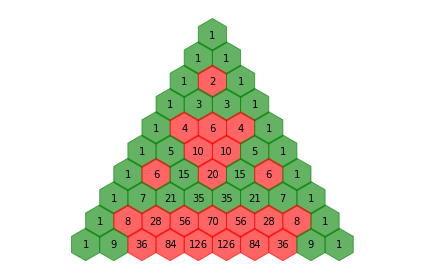

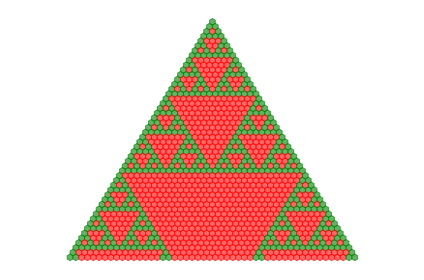

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as ptch
from matplotlib.collections import PatchCollection

def get_pascal_vals(n: int):
    """ Get a list of all rows in a pascal triangle
    
    For example, the pascal triangle for n=5 is:
         1
        1 1
       1 2 1
      1 3 3 1
     1 4 6 4 1
    get_pascal_vals(5) would return:
    [
    [1],
    [1,1],
    [1,2,1],
    [1,3,3,1],
    [1,4,6,4,1],
    ]
    """
    root = 1
    vals = []
    for i in range(n+1):
        # base cases
        if i == 0:
            vals.append([root])
            continue
        # get values for the current line
        line = []
        for j in range(i):
            # edges
            if j == 0:
                line.append(vals[i-1][0])
            elif j == i-1:
                line.append(vals[i-1][-1])
            else:
                line.append(vals[i-1][j-1] + vals[i-1][j])
        vals.append(line)
    return vals[1:]

def show_pascal(n: int, show_numbers: bool = True):
    """ A visualization of the pascal triangle
    """
    vals = get_pascal_vals(n)
    hexagons = []
    hex_colors = []
    dist_center_to_side = math.cos(math.radians(30))
    labels = {}  # only populated if show_numbers=True
    for row_num in range(len(vals)):
        row = vals[row_num]
        y = len(vals) - row_num - (row_num*(dist_center_to_side/2))
        pts = []
        for i_num in range(len(row)):
            x = -(row_num-2*i_num)*dist_center_to_side
            pts.append((x,y))
            if show_numbers:
                labels[(x,y)] = row[i_num]
            hexagons.append(ptch.RegularPolygon((x,y), numVertices=6, radius=1, color='red'))
            hex_colors.append('red' if row[i_num] % 2 == 0 else 'green')
        #print(pts)
    p = PatchCollection(hexagons, alpha=0.6)
    fig, ax = plt.subplots()
    ax.add_collection(p)
    p.set_color(hex_colors)
    for center, num in labels.items():
        plt.text(center[0], center[1], num, horizontalalignment='center', verticalalignment='center')
    plt.axis('equal')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

show_pascal(10)
show_pascal(50, show_numbers=False)

- - -
- - -

### **7.** Symbolic Manipulation

Use sympy to specify and solve the following equations for $x$.

- $x^2 + 2x - 1 = 0$ 
- $a x^2 + bx + c = 0$

- - -
#### **Answer**

In [7]:
import sympy as sym
sym.init_printing(use_latex='mathjax')

x = sym.symbols("x")
f_1 = x**2 + 2*x - 1
sym.solve(f_1, x)

[-1 + √2, -√2 - 1]

In [8]:
x, a, b, c = sym.symbols("x a b c")
f_2 = a*x**2 + b*x + c
sym.solve(f_2, x)

⎡        _____________   ⎛       _____________⎞ ⎤
⎢       ╱           2    ⎜      ╱           2 ⎟ ⎥
⎢-b + ╲╱  -4⋅a⋅c + b    -⎝b + ╲╱  -4⋅a⋅c + b  ⎠ ⎥
⎢─────────────────────, ────────────────────────⎥
⎣         2⋅a                     2⋅a           ⎦

- - -
Also, evaluate the following integrals using sympy

- $\int x^2 dx$
- $\int x e^{6x} dx$
- $\int (3t+5)\cos(\frac{t}{4}) dt$

- - -
#### **Answer**

In [9]:
x = sym.symbols("x")
f_x = sym.integrate(x**2, x)
f_x

 3
x 
──
3 

In [10]:
x = sym.symbols("x")
f_x = sym.integrate(x*sym.exp(6*x), x)
f_x

           6⋅x
(6⋅x - 1)⋅ℯ   
──────────────
      36      

In [11]:
t = sym.symbols("t")
f_x = sym.integrate((3*t+5)*sym.cos(t/4), t)
f_x

        ⎛t⎞         ⎛t⎞         ⎛t⎞
12⋅t⋅sin⎜─⎟ + 20⋅sin⎜─⎟ + 48⋅cos⎜─⎟
        ⎝4⎠         ⎝4⎠         ⎝4⎠

- - -
- - -

### **8.** Typesetting

Use LaTeX to typeset the following equations.

<img src="https://www.sciencealert.com/images/Equations_web.jpg">

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/dd4df8b838eb08d67530dce5a512756666204499">

- - -
#### **Answer**


<b>1. Pythagora's Theorem</b>

$ a^2 + b^2 = c^2 $


<b>2. Logarithms</b>

$ \log xy = \log x + \log y $


<b>3. Calculus</b>

$ \frac{df}{dt} = lim_{h \rightarrow 0} = \frac{f(t_h) - f(t)}{h}  $


<b>4. Law of Gravity</b>

$ F = G\frac{m_1m_2}{r^2} $


<b>5. The Square root of -1</b>

$ i^2 = -1 $


<b>6. Euler's Formula for Polyhedra</b>
    
$ V - E + F = 2 $


<b>7. Normal Distribution</b>

$ \Phi(x) = \frac{1}{\sqrt{2\pi\rho}}e{\frac{(x-\mu){2}}{2\rho^2}} $


<b>8. Wave Equation</b>

$ \frac{\partial^2u}{\partial t^2} = c^2 \frac{\partial^2u}{\partial x^2} $


<b>9. Fourier Transform</b>

$ f(\omega) = \int_{-\infty}^\infty f(x) e^{-2\pi i x \omega} dx $


<b>10. Navier-Stokes Equation</b>

$ \rho(\frac{\partial v}{\partial t} + v \cdot \nabla v ) = - \nabla p + \nabla \cdot \boldsymbol{T} + f $


<b>11. Maxwell's Equations</b>

$ \nabla \cdot \boldsymbol{E} = 0 $

$ \nabla \times \boldsymbol{E} = - \frac{1}{c} \frac{\partial \boldsymbol{H}}{\partial t} $
    
$ \nabla \cdot \boldsymbol{H} = 0 $
    
$ \nabla \times \boldsymbol{H} = \frac{1}{c} \frac{\partial \boldsymbol{E}}{\partial t} $


<b>12. Second Law of Thermodynamics</b>

$ d\boldsymbol{S} \ge 0 $


<b>13. Relativity</b>

$ \boldsymbol{E} = mc^2 $


<b>14. Schrodinger's Equation</b>

$ i \hbar \frac{\partial}{\partial t}\Psi = H \Psi $


<b>15. Information Theory</b>

$ H = - \sum p(x) \log p(x) $


<b>16. Chaos Theory</b>

$ x_{t+1} = kx_t(1-x_t) $


<b>17. Black-Scholes Equation</b>

$ \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} + r S \frac{\partial V}{\partial S} + \frac{\partial V}{\partial t} - r V = 0 $


<b>The last one:</b>

$
    {\displaystyle 
        {\begin{bmatrix}
            \lambda _{1}&1&0&0&0\\
            0&\lambda _{1}&1&0&0\\
            0&0&\lambda _{1}&0&0\\
            0&0&0&\lambda _{2}&1\\
            0&0&0&0&\lambda _{2}
        \end{bmatrix}
    }^{n}={
        \begin{bmatrix}
            \lambda _{1}^{n}&{\tbinom {n}{1}}\lambda _{1}^{n-1}&{\tbinom {n}{2}}\lambda _{1}^{n-2}&0&0\\
            0&\lambda _{1}^{n}&{\tbinom {n}{1}}\lambda _{1}^{n-1}&0&0\\
            0&0&\lambda _{1}^{n}&0&0\\
            0&0&0&\lambda _{2}^{n}&{\tbinom {n}{1}}\lambda _{2}^{n-1}\\
            0&0&0&0&\lambda _{2}^{n}
        \end{bmatrix}
    },}
$

Notes about that last one:
1. If you are viewing the image in Jupyter Dark colorscheme, you cannot see it because of the transparency of the image
2. If you go to the URL of the image, the title of the webpage is the LaTeX code needed to reproduce it.